# Preparation

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import itertools
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Baca data dari file
file_path = "/content/PDB_1.xlsx"
df = pd.read_excel(file_path)
display(df)

,TANGGAL,JUMLAH PRODUKSI,TAHUN,TERMINAL,BULAN,KD_TERTAGIH,NAMA_TERTAGIH,KODE_KAPAL,NAMA_KAPAL,KD_JNS_PBM,...,TARIF_JASA,MATA_UANG,JASA,NAMA_POL,NAMA_POD,NAMA_TERMINAL,NAMA_DERMAGA,NO_APPROVAL,NO_PRANOTA,SATUAN_BRG
0,2024-01-01,65,2024,MIRAH,JAN,210012044,"CAHAYA MITRA MARITIM, PT",I000000408,DANAWIRA,NONPELINDO,...,8330,IDR,STEVED,TANJUNG PERAK,BANJARMASIN,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0027351/28101,RJ610200040124,TON_HARI
1,2024-01-01,20,2024,MIRAH,JAN,11425,"ADI PUTRA PANGESTU, PT",I000001732,TARUNA PUTRA VIII,NONPELINDO,...,550,IDR,PASSPLB,TANJUNG PERAK,BERAU,TERMINAL MIRAH,MIRAH TIMUR,AR-2024-0083880/28101,RJ610200470124,JAM
2,2024-01-01,30,2024,MIRAH,FEB,610000262,TUNAS JAYA PERMAI,I000001809,BUNGA TERATAI XXI,NONPELINDO,...,8330,IDR,STEVED,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0292819/28101,RJ610201040224,TON_HARI
3,2024-01-02,65,2024,MIRAH,JAN,210012044,"CAHAYA MITRA MARITIM, PT",I000000408,DANAWIRA,NONPELINDO,...,2550,IDR,DERMAGA,TANJUNG PERAK,BANJARMASIN,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0027351/28101,RJ610200040124,BOX
4,2024-01-02,20,2024,MIRAH,JAN,11425,"ADI PUTRA PANGESTU, PT",I000001732,TARUNA PUTRA VIII,NONPELINDO,...,8330,IDR,STEVED,TANJUNG PERAK,BERAU,TERMINAL MIRAH,MIRAH TIMUR,AR-2024-0083880/28101,RJ610200470124,TON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,2025-11-29,470,2025,MIRAH,MAY,610000262,TUNAS JAYA PERMAI,I000007535,CAHAYA ABADI 202,NONPELINDO,...,8330,IDR,STEVED,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH TIMUR,I880119418/2025,RJ610204680525,TON
1179,2025-12-06,490,2025,MIRAH,MAY,610000262,TUNAS JAYA PERMAI,I000007535,CAHAYA ABADI 202,NONPELINDO,...,5100,IDR,DERMAGA,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH TIMUR,I880119418/2025,RJ610204680525,M3_HARI
1180,2025-12-13,460,2025,MIRAH,MAY,610000262,TUNAS JAYA PERMAI,I000007535,CAHAYA ABADI 202,NONPELINDO,...,550,IDR,PASSPLB,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH TIMUR,I880119418/2025,RJ610204680525,TON
1181,2025-12-20,470,2025,MIRAH,MAY,210013963,"MULTI KARGO NUSANTARA, PT",I000000101,ALTAMANDA,NONPELINDO,...,2550,IDR,DERMAGA,TANJUNG PERAK,BANJARMASIN,TERMINAL MIRAH,MIRAH SELATAN,I880119394/2025,RJ610204520525,M3_HARI


In [4]:
print(df.dtypes)

TANGGAL            datetime64[ns]
JUMLAH PRODUKSI             int64
TAHUN                       int64
TERMINAL                   object
BULAN                      object
KD_TERTAGIH                 int64
NAMA_TERTAGIH              object
KODE_KAPAL                 object
NAMA_KAPAL                 object
KD_JNS_PBM                 object
KD_BRG                     object
NAMA_BARANG                object
KEMASAN_BRG                object
SIFAT_BRG                   int64
JNS_BM                     object
TAGIHAN                     int64
TARIF_JASA                  int64
MATA_UANG                  object
JASA                       object
NAMA_POL                   object
NAMA_POD                   object
NAMA_TERMINAL              object
NAMA_DERMAGA               object
NO_APPROVAL                object
NO_PRANOTA                 object
SATUAN_BRG                 object
dtype: object


# Pre Processing

In [5]:
# Memeriksa Missing Value
print("\nMemeriksa missing value:\n")
missing_values = df.isnull().sum()
print(missing_values)

# Mengecek total missing values di seluruh dataset
total_missing = missing_values.sum()
print(f"\nTotal missing values: {total_missing}")


Memeriksa missing value:

TANGGAL            0
JUMLAH PRODUKSI    0
TAHUN              0
TERMINAL           0
BULAN              0
KD_TERTAGIH        0
NAMA_TERTAGIH      0
KODE_KAPAL         0
NAMA_KAPAL         0
KD_JNS_PBM         0
KD_BRG             0
NAMA_BARANG        0
KEMASAN_BRG        0
SIFAT_BRG          0
JNS_BM             0
TAGIHAN            0
TARIF_JASA         0
MATA_UANG          0
JASA               0
NAMA_POL           0
NAMA_POD           0
NAMA_TERMINAL      0
NAMA_DERMAGA       0
NO_APPROVAL        0
NO_PRANOTA         0
SATUAN_BRG         0
dtype: int64

Total missing values: 0


In [6]:
# Pastikan kolom tanggal bertipe datetime
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])

df = df.sort_values('TANGGAL')
df.set_index('TANGGAL', inplace=True)

df

,JUMLAH PRODUKSI,TAHUN,TERMINAL,BULAN,KD_TERTAGIH,NAMA_TERTAGIH,KODE_KAPAL,NAMA_KAPAL,KD_JNS_PBM,KD_BRG,...,TARIF_JASA,MATA_UANG,JASA,NAMA_POL,NAMA_POD,NAMA_TERMINAL,NAMA_DERMAGA,NO_APPROVAL,NO_PRANOTA,SATUAN_BRG
TANGGAL,,,,,,,,,,,,,,,,,,,,,
2024-01-01,65,2024,MIRAH,JAN,210012044,"CAHAYA MITRA MARITIM, PT",I000000408,DANAWIRA,NONPELINDO,B000000330,...,8330,IDR,STEVED,TANJUNG PERAK,BANJARMASIN,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0027351/28101,RJ610200040124,TON_HARI
2024-01-01,20,2024,MIRAH,JAN,11425,"ADI PUTRA PANGESTU, PT",I000001732,TARUNA PUTRA VIII,NONPELINDO,B000000221,...,550,IDR,PASSPLB,TANJUNG PERAK,BERAU,TERMINAL MIRAH,MIRAH TIMUR,AR-2024-0083880/28101,RJ610200470124,JAM
2024-01-01,30,2024,MIRAH,FEB,610000262,TUNAS JAYA PERMAI,I000001809,BUNGA TERATAI XXI,NONPELINDO,B000000090,...,8330,IDR,STEVED,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0292819/28101,RJ610201040224,TON_HARI
2024-01-02,65,2024,MIRAH,JAN,210012044,"CAHAYA MITRA MARITIM, PT",I000000408,DANAWIRA,NONPELINDO,B000000330,...,2550,IDR,DERMAGA,TANJUNG PERAK,BANJARMASIN,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0027351/28101,RJ610200040124,BOX
2024-01-02,20,2024,MIRAH,JAN,11425,"ADI PUTRA PANGESTU, PT",I000001732,TARUNA PUTRA VIII,NONPELINDO,B000000156,...,8330,IDR,STEVED,TANJUNG PERAK,BERAU,TERMINAL MIRAH,MIRAH TIMUR,AR-2024-0083880/28101,RJ610200470124,TON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-29,470,2025,MIRAH,MAY,610000262,TUNAS JAYA PERMAI,I000007535,CAHAYA ABADI 202,NONPELINDO,B000000449,...,8330,IDR,STEVED,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH TIMUR,I880119418/2025,RJ610204680525,TON
2025-12-06,490,2025,MIRAH,MAY,610000262,TUNAS JAYA PERMAI,I000007535,CAHAYA ABADI 202,NONPELINDO,B000000449,...,5100,IDR,DERMAGA,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH TIMUR,I880119418/2025,RJ610204680525,M3_HARI
2025-12-13,460,2025,MIRAH,MAY,610000262,TUNAS JAYA PERMAI,I000007535,CAHAYA ABADI 202,NONPELINDO,B000000449,...,550,IDR,PASSPLB,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH TIMUR,I880119418/2025,RJ610204680525,TON


In [7]:
# Menampilkan hasil resample per minggu dari kolom JUMLAH PRODUKSI

ts_weekly = df['JUMLAH PRODUKSI'].resample('W').sum()
pd.set_option('display.max_rows', None)
ts_weekly

,JUMLAH PRODUKSI
TANGGAL,
2024-01-07,450
2024-01-14,463
2024-01-21,450
2024-01-28,460
2024-02-04,450
2024-02-11,450
2024-02-18,455
2024-02-25,455
2024-03-03,450


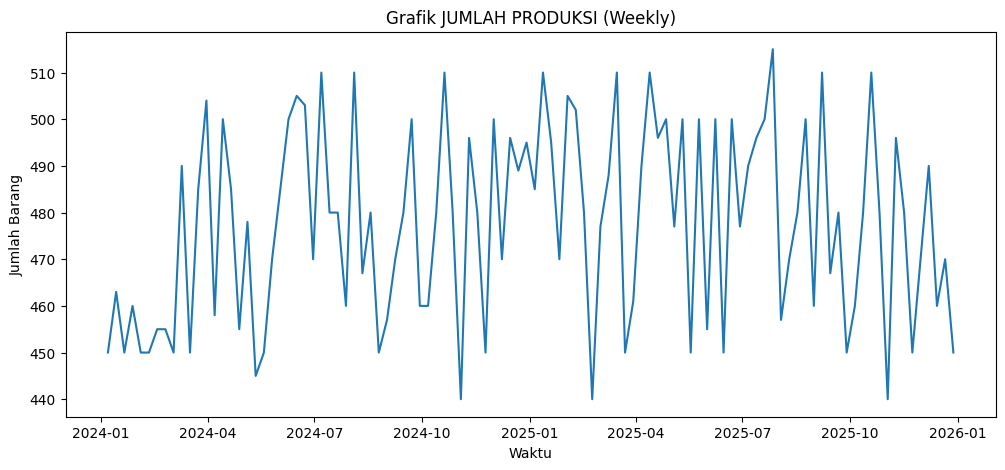

In [9]:
#  Visualisasi grafik JUMLAH PRODUKSI

plt.figure(figsize=(12,5))
plt.plot(ts_weekly)
plt.title("Grafik JUMLAH PRODUKSI (Weekly)")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Barang")
plt.show()

In [10]:
# Identifikasi Outlier

Q1 = ts_weekly.quantile(0.25)
Q3 = ts_weekly.quantile(0.75)
IQR = Q3 - Q1

outlier = ts_weekly[(ts_weekly < Q1 - 1.5*IQR) |
                     (ts_weekly > Q3 + 1.5*IQR)]

outlier

,JUMLAH PRODUKSI
TANGGAL,


In [11]:
# Mengecek jumlah total entri yang bernilai nol (0) dalam data mingguan

(ts_weekly == 0).sum()
ts_weekly[ts_weekly == 0]

,JUMLAH PRODUKSI
TANGGAL,


# Modelling

In [12]:
# Pembagian Data Latih (Training) dan Uji (Testing)

split = int(len(ts_weekly) * 0.8)

train = ts_weekly[:split]
test = ts_weekly[split:]

print(len(train), len(test))

83 21


In [13]:
# Tes ADF

def adf_test(series, alpha=0.05):
    result = adfuller(series)
    adf_stat = result[0]
    p_value = result[1]

    print("=== Augmented Dickey-Fuller Test ===")
    print(f"ADF Statistic : {adf_stat:}")
    print(f"p-value       : {p_value:}")

    if p_value <= alpha:
        print("Kesimpulan    : Tolak H0 → Data STASIONER")
    else:
        print("Kesimpulan    : Gagal tolak H0 → Data TIDAK STASIONER")

adf_test(train)

=== Augmented Dickey-Fuller Test ===
ADF Statistic : -8.365162026544915
p-value       : 2.7555347762603486e-13
Kesimpulan    : Tolak H0 → Data STASIONER


In [14]:
# Tes KPSS

def kpss_test(series, alpha=0.05):
    statistic, p_value, _, _ = kpss(series, regression='c')

    print("=== KPSS Test ===")
    print(f"KPSS Statistic: {statistic:}")
    print(f"p-value       : {p_value:}")

    if p_value <= alpha:
        print("Kesimpulan    : Gagal tolak H0 → Data STASIONER")
    else:
        print("Kesimpulan    : Tolak H0 → Data TIDAK stasionerR")

kpss_test(train)

=== KPSS Test ===
KPSS Statistic: 0.6828440041177146
p-value       : 0.015105090534753216
Kesimpulan    : Gagal tolak H0 → Data STASIONER


In [15]:
# Pencarian Model ARIMA Terbaik Otomatis (Auto-ARIMA)

auto_model = pm.auto_arima(
    train,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=788.231, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=758.727, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=786.232, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=754.956, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=748.077, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=748.379, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=746.273, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=753.036, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=746.662, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=742.370, Time=0.13 sec
 A

In [16]:
# Mencari parameter ARIMA terbaik dengan Grid Search

p = range(0, 4)
d = [1]
q = range(0, 4)

pdq = list(itertools.product(p, d, q))
results = []

for order in pdq:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=len(test))
        forecast.index = test.index

        # Evaluasi model (VALIDASI)
        mape = mean_absolute_percentage_error(test, forecast) * 100
        mse = mean_squared_error(test, forecast)
        rmse = np.sqrt(mse)

        results.append({
            'order': order,
            'AIC': model_fit.aic,
            'MAPE (%)': mape,
            'MSE': mse,
            'RMSE': rmse
        })

    except:
        continue

results_df = pd.DataFrame(results)

# Urutkan model terbaik
results_df.sort_values(['MAPE (%)', 'RMSE', 'AIC']).head(10)

,order,AIC,MAPE (%),MSE,RMSE
4,"(1, 1, 0)",756.756750,3.518925,390.725859,19.766787
15,"(3, 1, 3)",744.815464,3.888224,463.838789,21.536917
7,"(1, 1, 3)",741.941135,3.951092,482.708388,21.970626
14,"(3, 1, 2)",743.950380,3.954689,483.004976,21.977374
10,"(2, 1, 2)",741.950411,3.954715,482.998653,21.977230
13,"(3, 1, 1)",742.369525,4.007594,494.113723,22.228669
9,"(2, 1, 1)",740.455086,4.023823,495.462517,22.258987
8,"(2, 1, 0)",753.035566,4.048265,498.552933,22.328299
3,"(0, 1, 3)",740.737419,4.048598,498.673013,22.330988
1,"(0, 1, 1)",737.670362,4.053846,496.792570,22.288844


In [17]:
# Inisialisasi dan Pelatihan Model ARIMA (DATA TRAIN - VALIDASI)

best_order = (3, 1, 3)

model = ARIMA(train, order=best_order)
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        JUMLAH PRODUKSI   No. Observations:                   83
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -365.408
Date:                Sat, 03 Jan 2026   AIC                            744.815
Time:                        02:07:21   BIC                            761.662
Sample:                    01-07-2024   HQIC                           751.579
                         - 08-03-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2444      0.152     -1.606      0.108      -0.543       0.054
ar.L2         -0.9354      0.118     -7.933      0.000      -1.166      -0.704
ar.L3         -0.1113      0.144     -0.773      0.4

In [18]:
# Pelatihan Model ARIMA AKHIR menggunakan SELURUH DATA

final_model = ARIMA(ts_weekly, order=(3,1,3))

final_model_fit = final_model.fit()

print(final_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        JUMLAH PRODUKSI   No. Observations:                  104
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -456.269
Date:                Sat, 03 Jan 2026   AIC                            926.539
Time:                        02:07:23   BIC                            944.982
Sample:                    01-07-2024   HQIC                           934.009
                         - 12-28-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7140      0.128    -13.422      0.000      -1.964      -1.464
ar.L2         -0.9931      0.213     -4.660      0.000      -1.411      -0.575
ar.L3         -0.0837      0.127     -0.658      0.5

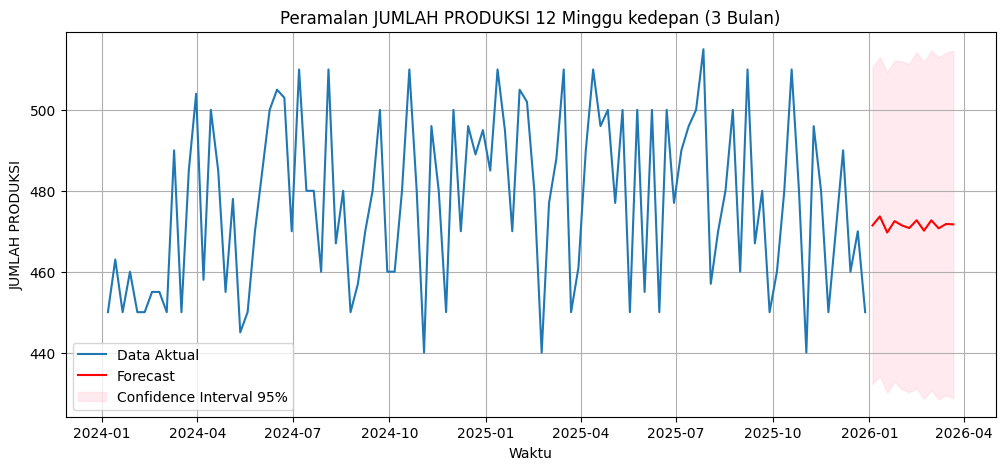

In [19]:
# Forecast final

forecast_steps = 12

forecast = final_model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12,5))
plt.plot(ts_weekly, label='Data Aktual')
plt.plot(forecast_mean, label='Forecast', color='red')

plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval 95%'
)

plt.title('Peramalan JUMLAH PRODUKSI 12 Minggu kedepan (3 Bulan)')
plt.xlabel('Waktu')
plt.ylabel('JUMLAH PRODUKSI')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print("Hasil Forecast JUMLAH PRODUKSI:")


Hasil Forecast JUMLAH PRODUKSI:


In [21]:
forecast_df = pd.DataFrame({
    'Forecast_JUMLAH_BRG': forecast_mean,
    'Lower_CI_95%': forecast_ci.iloc[:, 0],
    'Upper_CI_95%': forecast_ci.iloc[:, 1]
})

forecast_df

,Forecast_JUMLAH_BRG,Lower_CI_95%,Upper_CI_95%
2026-01-04,471.443763,432.307573,510.579954
2026-01-11,473.663674,434.234869,513.092479
2026-01-18,469.690196,430.102627,509.277765
2026-01-25,472.500901,432.843651,512.158151
2026-02-01,471.443706,430.892784,511.994628
2026-02-08,470.796984,430.242852,511.351115
2026-02-15,472.720087,431.160276,514.279898
2026-02-22,470.154690,428.584447,511.724932
2026-03-01,472.696008,430.698577,514.693439
2026-03-08,470.726987,428.477299,512.976674


In [22]:
df

,JUMLAH PRODUKSI,TAHUN,TERMINAL,BULAN,KD_TERTAGIH,NAMA_TERTAGIH,KODE_KAPAL,NAMA_KAPAL,KD_JNS_PBM,KD_BRG,...,TARIF_JASA,MATA_UANG,JASA,NAMA_POL,NAMA_POD,NAMA_TERMINAL,NAMA_DERMAGA,NO_APPROVAL,NO_PRANOTA,SATUAN_BRG
TANGGAL,,,,,,,,,,,,,,,,,,,,,
2024-01-01,65,2024,MIRAH,JAN,210012044,"CAHAYA MITRA MARITIM, PT",I000000408,DANAWIRA,NONPELINDO,B000000330,...,8330,IDR,STEVED,TANJUNG PERAK,BANJARMASIN,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0027351/28101,RJ610200040124,TON_HARI
2024-01-01,20,2024,MIRAH,JAN,11425,"ADI PUTRA PANGESTU, PT",I000001732,TARUNA PUTRA VIII,NONPELINDO,B000000221,...,550,IDR,PASSPLB,TANJUNG PERAK,BERAU,TERMINAL MIRAH,MIRAH TIMUR,AR-2024-0083880/28101,RJ610200470124,JAM
2024-01-01,30,2024,MIRAH,FEB,610000262,TUNAS JAYA PERMAI,I000001809,BUNGA TERATAI XXI,NONPELINDO,B000000090,...,8330,IDR,STEVED,TANJUNG PERAK,SAMARINDA,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0292819/28101,RJ610201040224,TON_HARI
2024-01-02,65,2024,MIRAH,JAN,210012044,"CAHAYA MITRA MARITIM, PT",I000000408,DANAWIRA,NONPELINDO,B000000330,...,2550,IDR,DERMAGA,TANJUNG PERAK,BANJARMASIN,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0027351/28101,RJ610200040124,BOX
2024-01-02,20,2024,MIRAH,JAN,11425,"ADI PUTRA PANGESTU, PT",I000001732,TARUNA PUTRA VIII,NONPELINDO,B000000156,...,8330,IDR,STEVED,TANJUNG PERAK,BERAU,TERMINAL MIRAH,MIRAH TIMUR,AR-2024-0083880/28101,RJ610200470124,TON
2024-01-02,30,2024,MIRAH,FEB,210012091,"GEMILANG UTAMA JAYA INDONESIA, PT",I000012439,CIPTA JAYA HARAPAN 9,NONPELINDO,B000000762,...,8330,IDR,STEVED,TANJUNG PERAK,BENETE,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0292820/28101,RJ610201050224,TON_HARI
2024-01-03,30,2024,MIRAH,JAN,210013976,"QUANTA INTI STEVEDORE, PT",I000000465,AYU 58,NONPELINDO,B000000394,...,8330,IDR,STEVED,PERAWANG,TANJUNG PERAK,TERMINAL MIRAH,MIRAH TIMUR,AR-2024-0039061/28101,RJ610200070124,TON_HARI
2024-01-03,20,2024,MIRAH,JAN,11425,"ADI PUTRA PANGESTU, PT",I000001732,TARUNA PUTRA VIII,NONPELINDO,B000000221,...,8330,IDR,STEVED,TANJUNG PERAK,BERAU,TERMINAL MIRAH,MIRAH TIMUR,AR-2024-0083880/28101,RJ610200470124,TON
2024-01-03,10,2024,MIRAH,JAN,210012044,"CAHAYA MITRA MARITIM, PT",I000001420,MUTIARA OCEAN,NONPELINDO,B000000330,...,2550,IDR,DERMAGA,TANJUNG PERAK,BALIKPAPAN,TERMINAL MIRAH,MIRAH SELATAN,AR-2024-0154832/28101,RJ610200140124,TON
